In [56]:
!pip install MetaTrader5 --quiet
!pip install pandas --quiet
!pip install dateandtime --quiet
!pip install mplfinance --quiet


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# documentation: https://www.mql5.com/en/docs/integration/python_metatrader5

import MetaTrader5 as mt
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

In [5]:
# start the platform with initialize()
mt.initialize()

True

In [57]:
# porfolio specification
login = 272816110
password = '[Pass123]'
server = 'Exness-MT5Trial14'

mt.login(login, password, server)

True

In [7]:
# get account info
account_info = mt.account_info()
print(account_info)

# getting specific account data
login_number = account_info.login
balance = account_info.balance
equity = account_info.equity

print()
print('login: ', login_number)
print('balance: ', balance)
print('equity: ', equity)

AccountInfo(login=272816110, trade_mode=0, leverage=2000000000, limit_orders=1024, margin_so_mode=0, trade_allowed=True, trade_expert=True, margin_mode=2, currency_digits=2, fifo_close=False, balance=20.0, credit=0.0, profit=0.0, equity=20.0, margin=0.0, margin_free=20.0, margin_level=0.0, margin_so_call=60.0, margin_so_so=0.0, margin_initial=0.0, margin_maintenance=0.0, assets=0.0, liabilities=0.0, commission_blocked=0.0, name='cantcentthebotbruh', server='Exness-MT5Trial14', currency='USD', company='Exness Technologies Ltd')

login:  272816110
balance:  20.0
equity:  20.0


In [13]:
# get symbol specifications
symbol_info = mt.symbol_info("XAUUSDm")._asdict()
symbol_info

{'custom': False,
 'chart_mode': 0,
 'select': True,
 'visible': True,
 'session_deals': 0,
 'session_buy_orders': 0,
 'session_sell_orders': 0,
 'volume': 0,
 'volumehigh': 0,
 'volumelow': 0,
 'time': 1763449467,
 'digits': 3,
 'spread': 160,
 'spread_float': True,
 'ticks_bookdepth': 0,
 'trade_calc_mode': 0,
 'trade_mode': 4,
 'start_time': 0,
 'expiration_time': 0,
 'trade_stops_level': 0,
 'trade_freeze_level': 0,
 'trade_exemode': 2,
 'swap_mode': 1,
 'swap_rollover3days': 3,
 'margin_hedged_use_leg': False,
 'expiration_mode': 15,
 'filling_mode': 3,
 'order_mode': 127,
 'order_gtc_mode': 0,
 'option_mode': 0,
 'option_right': 0,
 'bid': 4006.8,
 'bidhigh': 4045.052,
 'bidlow': 4004.779,
 'ask': 4006.96,
 'askhigh': 4045.212,
 'asklow': 4004.939,
 'last': 0.0,
 'lasthigh': 0.0,
 'lastlow': 0.0,
 'volume_real': 0.0,
 'volumehigh_real': 0.0,
 'volumelow_real': 0.0,
 'option_strike': 0.0,
 'point': 0.001,
 'trade_tick_value': 0.1,
 'trade_tick_value_profit': 0.1,
 'trade_tick_valu

In [53]:
#Fetch OHLC + Tick Volume

# Fetch data
rates = mt.copy_rates_from_pos(symbol, mt.TIMEFRAME_M5, 0, 500)

# Convert to DataFrame
df = pd.DataFrame(rates)

# Convert timestamp to datetime
df['time'] = pd.to_datetime(df['time'], unit='s')

# Set time as index
df.set_index('time', inplace=True)

# Keep OHLC + volume
df = df[['open', 'high', 'low', 'close', 'tick_volume']]

# Rename columns
df.rename(columns={
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'tick_volume': 'Volume'
}, inplace=True)

# Optional: show the dataframe
print(df.head())


                         Open      High       Low     Close  Volume
time                                                               
2025-11-14 12:10:00  4135.493  4135.609  4123.926  4125.966    4320
2025-11-14 12:15:00  4126.021  4128.646  4115.812  4118.677    4000
2025-11-14 12:20:00  4118.634  4121.268  4112.414  4119.973    4405
2025-11-14 12:25:00  4120.022  4121.387  4110.869  4113.405    3320
2025-11-14 12:30:00  4113.459  4118.210  4110.070  4114.769    3037


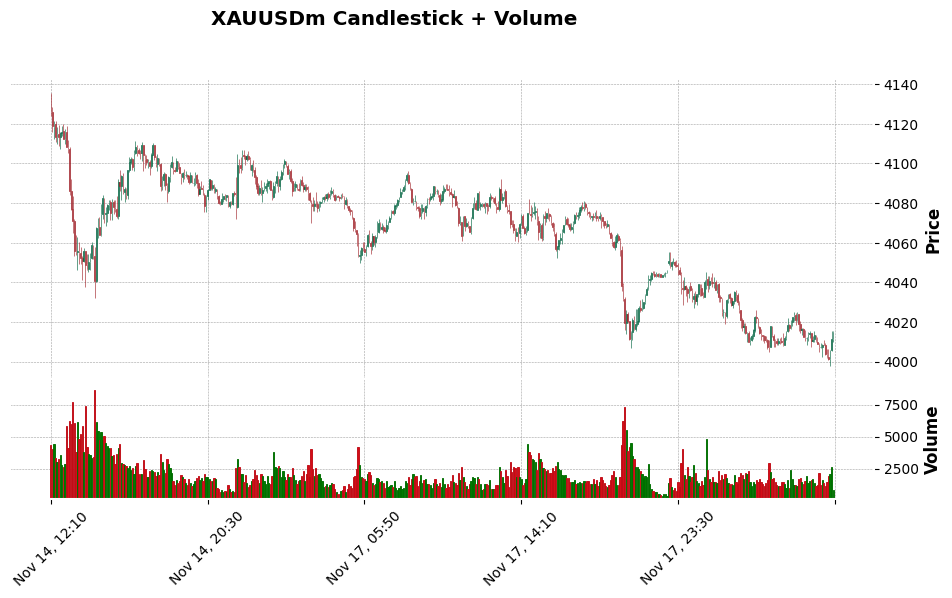

In [54]:
mpf.plot(
    df,
    type='candle',
    style='charles',
    volume=True,        # <-- show volume bars
    title=f"{symbol} Candlestick + Volume",
    ylabel="Price",
    ylabel_lower="Volume",
    figsize=(12,6)
)